# Simulating Daily Demand for a Medical Department

## Introduction
This code simulates the daily patient census for a small department in a hospital and is part of a larger system for analyzing staffing policies. I would always prefer to work with data from the system I am modeling, but in this case, waiting for data would have delayed the work. Instead, I conducted interviews with the client to determine the characteristics of their day-to-day demand. They told me their patient census was rarely consistent from one day to the next, but that the change was usually relatively small. They also provided typical values for lows and highs, and approximated the mean daily census.

I used the following packages in this work.

In [7]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

low_value = 8
high_value = 37
avg_value = 24

## Daily Change
I decided to generate random variates from a Poisson distribution to model the daily change in patient census. I experimented with different values for the mean delta ($\lambda$) and after validating the results with the client, settled on 2.5.

<Axes: ylabel='Probability'>

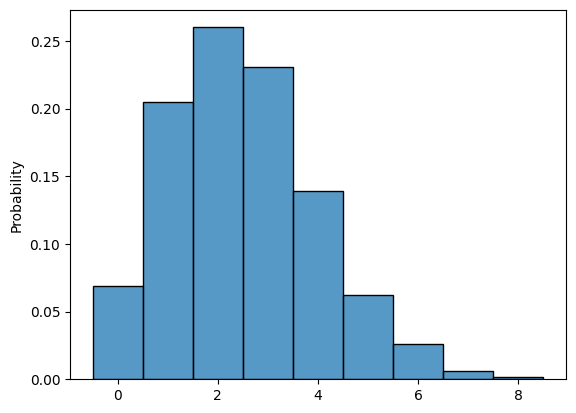

In [4]:
variates = []
for i in range(1000):
    variates.append(np.random.poisson(lam=2.5))
sns.histplot(variates, discrete=True, stat='probability')

## Daily Demand
Next I generated a time series of patient counts, using the average value as the first data point. Values near historic highs and lows were unlikely, so the likelihood of the census increasing is very high when the census is near a historic low. Similarly, the probability of the census decreasing is larger when the census is near a historic high.

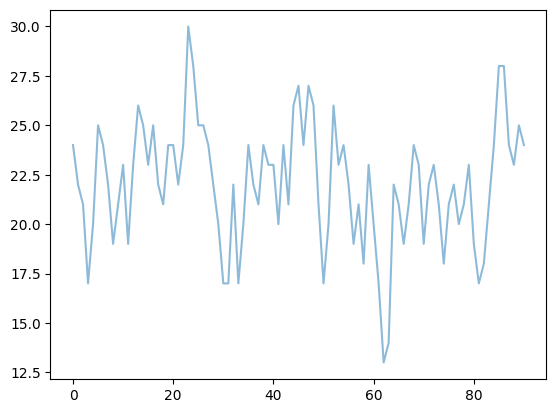

In [8]:
patient_count = [avg_value]
value = avg_value
delta = []
lam = 2.5
# generating 90 days of data
for i in range(90):
    # determine if the next day's census will increase or decrease; the 2 and 3 were determined through experimenation
    prob_increase = st.norm.cdf((avg_value-value-2)/3)
    if np.random.random() < prob_increase:
        sign = 1
    else:
        sign = -1
    # generating the size of the daily change
    change = np.random.poisson(lam=lam)
    # the next day's value is the current day's value plus or minus the change
    value = value + sign * change
    patient_count.append(value)
    delta.append(sign * change)
plt.plot(patient_count, alpha=0.5)

In [9]:
np.mean(patient_count)

22.021978021978022

The plot above shows the patient count for each of the 90 simulated days. The client examined several such simulated time periods (90 days, 365 days, etc.) and determined that the time series were realistic. The mean value, however, was most often lower than the historical mean reported by the client. A histogram of the pateient counts is below.

<Axes: ylabel='Count'>

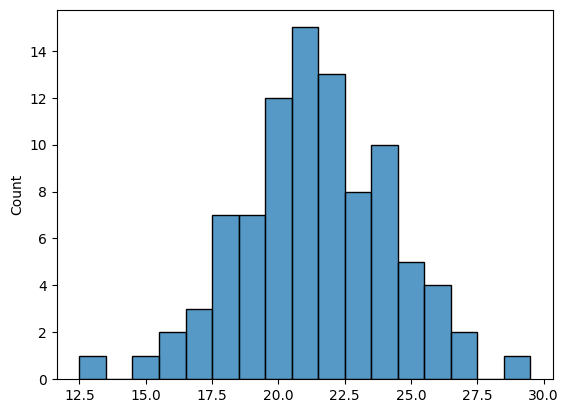

In [305]:
sns.histplot(patient_count, discrete=True)

The histogram above shows the distribution of the daily patient counts, and the histogram below shows the distribution of the daily change in patient count. The client thought that both were realistic.

<Axes: ylabel='Count'>

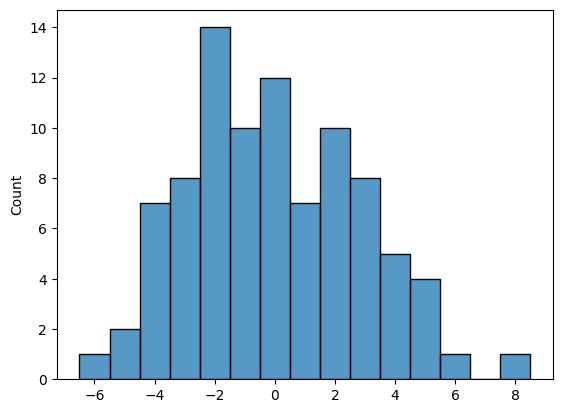

In [288]:
sns.histplot(delta, discrete=True)

This provided an acceptable simulation of the daily patient census.